In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [5]:
#1.1
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/574Foundation/csv files/males_ht_wt_cntry.csv'
data = pd.read_csv(file_path)

#1.2.a
# Display the first few rows of the dataframe
data.head()

,Height,Weight,Country
0,64.0,144.0,Italy
1,68.0,150.0,Italy
2,66.0,147.0,Italy
3,71.0,170.0,Italy
4,65.0,163.0,Italy


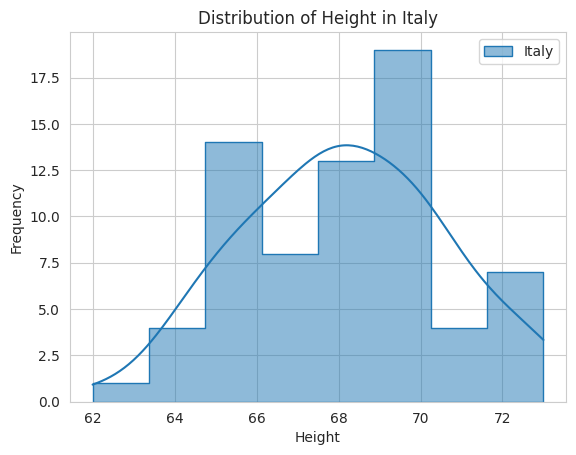

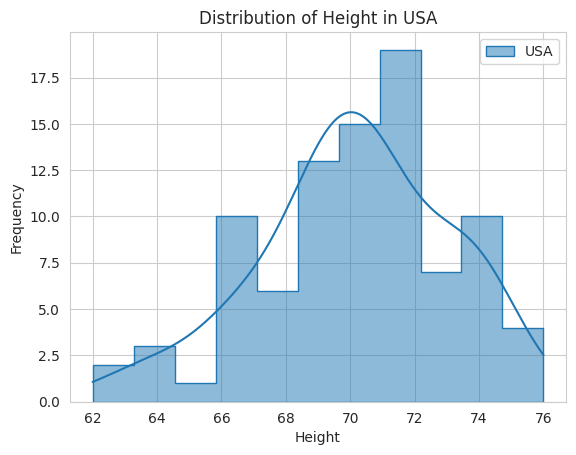

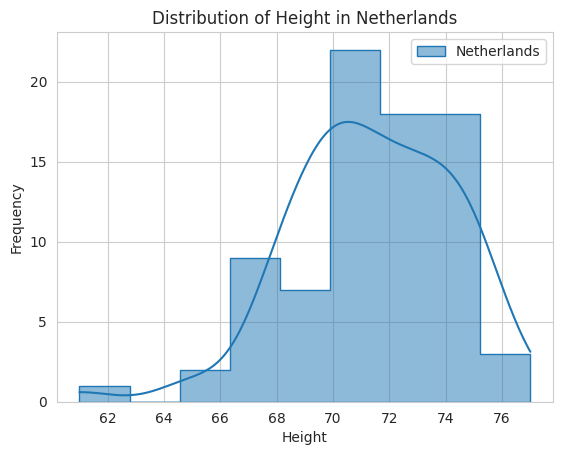

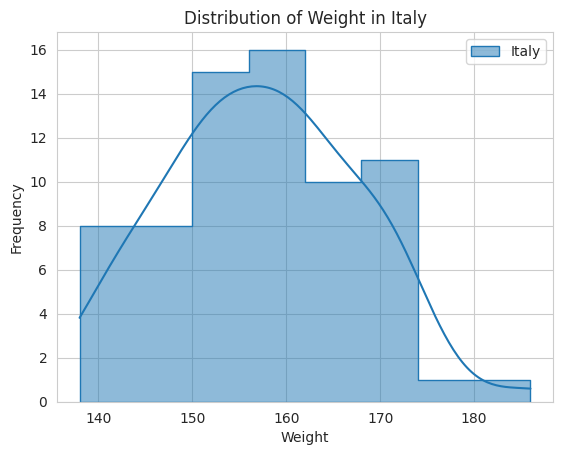

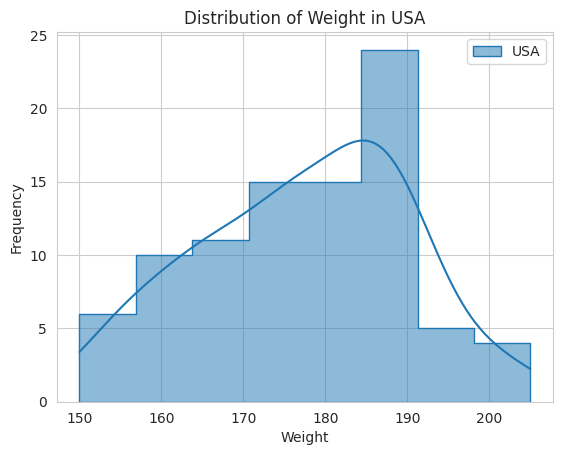

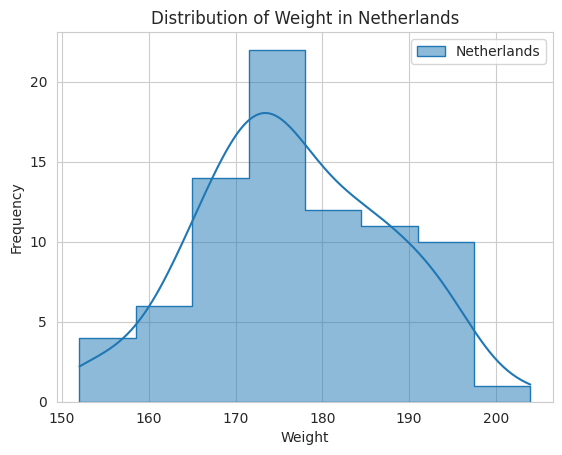

In [6]:
#1.2.b,1.2.c

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to generate histograms for each variable by country
def generate_histograms(data, variable):
    countries = data['Country'].unique()
    for country in countries:
        sns.histplot(data[data['Country'] == country][variable], kde=True, label=country, element="step")
        plt.title(f'Distribution of {variable} in {country}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Generate histograms for heights by country
generate_histograms(data, 'Height')
# Generate histograms for weights by country
generate_histograms(data, 'Weight')


In [7]:
#1.3
from scipy.stats import f_oneway, levene

# Extract unique countries
countries = data['Country'].unique()

# Prepare weights by country for ANOVA
weights_by_country = [data[data['Country'] == country]['Weight'] for country in countries]

# First, perform Levene's test to check the assumption of equal variances
levene_test = levene(*weights_by_country)

# Perform ANOVA test if variances are close to equal
anova_test = f_oneway(*weights_by_country)

levene_test, anova_test


(LeveneResult(statistic=2.657937494045452, pvalue=0.07218180380373036),
 F_onewayResult(statistic=73.0316861418844, pvalue=1.9503368513081563e-25))

In [8]:
#1.4
from scipy.stats import ttest_ind

# Extract weights for Italian and Dutch males
weights_italy = data[data['Country'] == 'Italy']['Weight']
weights_dutch = data[data['Country'] == 'Netherlands']['Weight']

# Extract weights for American males
weights_usa = data[data['Country'] == 'USA']['Weight']

# a. T-test between Italian and Dutch males
ttest_italy_dutch = ttest_ind(weights_italy, weights_dutch)

# b. T-test between American and Dutch males
ttest_usa_dutch = ttest_ind(weights_usa, weights_dutch)

ttest_italy_dutch, ttest_usa_dutch


(TtestResult(statistic=-11.135754716464666, pvalue=2.654162147999774e-21, df=148.0),
 TtestResult(statistic=0.3920914807972518, pvalue=0.6954875719362548, df=168.0))

a. T-test between Italian and Dutch males

Statistic: -11.135754716464666

P-value: 2.654162147999774e-21

Degrees of Freedom (df): 148.0

The negative t-statistic indicates that the average weight of Italian males is lower than that of Dutch males. The p-value is extremely small (far below any conventional significance level like 0.05 or 0.01), which strongly suggests that the observed difference in mean weights between Italian and Dutch males is statistically significant. This means we can reject the null hypothesis that there's no difference in average weights between these two groups, concluding that Italian and Dutch males have significantly different average weights.

b. T-test between American and Dutch males

Statistic: 0.3920914807972518

P-value: 0.6954875719362548

Degrees of Freedom (df): 168.0

The positive t-statistic here indicates that the average weight of American males is higher than that of Dutch males, but the difference is not statistically significant, as indicated by the high p-value (much greater than 0.05). This implies that any observed difference in mean weights between American and Dutch males could easily be due to random chance. Therefore, we fail to reject the null hypothesis for this comparison, suggesting there is no statistically significant difference in average weights between American and Dutch males.

In [17]:
#1.5
# Probability of at least one false positive in 3 independent tests
probability_true_negative = 0.95 ** 3
probability_at_least_one_false_positive = 1 - probability_true_negative

probability_at_least_one_false_positive


0.1426250000000001

In [10]:
#1.6
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for multiple comparisons
tukey_result = pairwise_tukeyhsd(data['Weight'], data['Country'], alpha=0.05)

tukey_result.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
Italy,Netherlands,19.2839,0.0,14.8586,23.7093,True
Italy,USA,20.0048,0.0,15.6957,24.3138,True
Netherlands,USA,0.7208,0.9119,-3.434,4.8757,False


In [11]:
#2.1
# Using the imperial formula to calculate BMI and create a new column in the dataframe
data['BMI'] = (data['Weight'] * 703) / (data['Height'] ** 2)

# Show the updated dataframe with the new BMI column
data.head()


,Height,Weight,Country,BMI
0,64.0,144.0,Italy,24.714844
1,68.0,150.0,Italy,22.804931
2,66.0,147.0,Italy,23.723829
3,71.0,170.0,Italy,23.707598
4,65.0,163.0,Italy,27.121657


In [12]:
#2.2
# Create a new 'Overweight' column based on the BMI values
data['Overweight'] = (data['BMI'] >= 25).astype(int)

# Show the updated dataframe with the new 'Overweight' column
data.head()


,Height,Weight,Country,BMI,Overweight
0,64.0,144.0,Italy,24.714844,0
1,68.0,150.0,Italy,22.804931,0
2,66.0,147.0,Italy,23.723829,0
3,71.0,170.0,Italy,23.707598,0
4,65.0,163.0,Italy,27.121657,1


In [13]:
#2.3
# Create a contingency table of overweight by nationality
overweight_by_nationality = pd.crosstab(data['Country'], data['Overweight'])

# Show the contingency table
overweight_by_nationality


Overweight,0,1
Country,,
Italy,54,16
Netherlands,48,32
USA,38,52


In [14]:
#2.4
from scipy.stats import chi2_contingency

# Conduct a Chi-Squared test of independence
chi2, p, dof, expected = chi2_contingency(overweight_by_nationality)

chi2, p, expected


(19.89224489795918,
 4.7913059538762396e-05,
 array([[40.83333333, 29.16666667],
        [46.66666667, 33.33333333],
        [52.5       , 37.5       ]]))

Because 4.7913059538762396e-05 < 0.05, the hypothesis of "there isn't significant correlation between overweight and countries" is rejected, there are correlations.

In [15]:
#3.1
import statsmodels.api as sm

# Define the predictor (independent variable) and response (dependent variable)
X = data['Height']
y = data['Weight']

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()

model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.82e-25
Time:                        21:36:52   Log-Likelihood:                -927.86
No. Observations:                 240   AIC:                             1860.
Df Residuals:                     238   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2547     17.138     -1.649      0.101     -62.016       5.507
Height         2.8537      0.245     11.659      0.000       2.371       3.336
==============================================================================
Omnibus:                        9.561   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.822
Skew:                           0.094   Prob(JB):                       0.0897
Kurtosis:                       2.332   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results of the linear regression analysis with height predicting weight are as follows:

The R-squared value is 0.364, indicating that approximately 36.4% of the variability in weight can be explained by height. This suggests that height has a moderate effect on weight, but there are other factors that also influence weight.

The adjusted R-squared value is slightly lower at 0.361, taking into account the number of predictors in the model (which is just one in this case).

The regression coefficient (slope) for height is 2.8537, with a standard error of 0.245. This coefficient is statistically significant, as indicated by the p-value (P>|t|) which is less than 0.001. It means that for each additional inch in height, the weight is expected to increase by approximately 2.85 pounds.

The intercept is -28.2547, with a standard error of 17.138. This coefficient represents the estimated weight when height is zero, which is not a practical value within the context of human measurements. The p-value for the intercept is not significant (p=0.101), suggesting that it may not be different from zero.

The F-statistic is 135.9 with a very low p-value, indicating that the model as a whole is statistically significant.

Diagnostic tests like Omnibus and Jarque-Bera test for the normality of residuals show p-values less than 0.05, suggesting that the residuals may not be normally distributed, which could affect the validity of the model's assumptions.

In [16]:
#3.2
import numpy as np

# Prepare the design matrix X and response vector y
X_matrix = np.column_stack((np.ones(len(X)), data['Height']))  # Adding a column of ones for the intercept
y_vector = data['Weight'].values

# Compute the coefficients using the normal equation: (X'X)^(-1)X'y
beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_vector

beta


array([-28.25470173,   2.85365311])

Intercept: -28.25470173

Slope : 2.85365311

These values obtained from the linear regression using linear algebra are virtually identical to the ones obtained from the OLS regression model using the statsmodels library:

Intercept from statsmodels: -28.2547

Slope for height from statsmodels: 2.8537